In [68]:
# Please take RegressionCurveFitting.jl and extend it to produce the graphs 4.14 a) (least squares) and 4.14 c) (LASSO) regression? 
# Produce 100 realizations of the data (different noise), and perform regressions with different degree of polynomial fit functions. 
# The two plots display the boxplot of the distributions of fitting parameters of the combined trials (you must find the appropriate 
# plotting function in Makie.jl).  You receive extra credit if you also plot the error distribution of both methods as in Fig. 4.15.

In [69]:
# RegressionCurveFitting.jl

In [70]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\Ciara Woellhof\Documents\BME\BME 574`


In [71]:
Pkg.add(["CairoMakie","LinearAlgebra","Statistics","Distributions","Convex","SCS"])

   Resolving package versions...
  No Changes to `C:\Users\Ciara Woellhof\Documents\BME\BME 574\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\Documents\BME\BME 574\Manifest.toml`


In [72]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS

In [73]:
# generates a range of linearly spaced numbers. It is a more memory-efficient way to define a range with a specific number of points between two values 
# LinRange(start, stop, n) where start is the first number in the range, stop is the last value, n is the number of points you want to generate.
x = LinRange(0,4,100)

100-element LinRange{Float64, Int64}:
 0.0, 0.040404, 0.0808081, 0.121212, …, 3.87879, 3.91919, 3.9596, 4.0

In [74]:
# Creates empty list that will hold float 64 numbers
col_list = Vector{Float64}[]
for p in 0:19 # for loop that iterates from 0 to 19, p will take values from 0 to 19 during each loop iteration 
    push!(col_list, x .^ p) # appends or pushes elements to the col_list array, computes element wise powers of the vector x raised to the power p . = element wise computation.
end
A = reduce(hcat,col_list) # applies hcat function repeatedly to all elements of col_list, combinging them into a larger matrix.

100×20 Matrix{Float64}:
 1.0  0.0         0.0          0.0          …  0.0          0.0
 1.0  0.040404    0.00163249   6.5959e-5       8.23467e-26  3.32714e-27
 1.0  0.0808081   0.00652995   0.000527672     2.15867e-20  1.74438e-21
 1.0  0.121212    0.0146924    0.00178089      3.19028e-17  3.86701e-18
 1.0  0.161616    0.0261198    0.00422138      5.65882e-15  9.14557e-16
 1.0  0.20202     0.0408122    0.00824488   …  3.14128e-13  6.34602e-14
 1.0  0.242424    0.0587695    0.0142472       8.36313e-12  2.02743e-12
 1.0  0.282828    0.0799918    0.022624        1.34095e-10  3.79257e-11
 1.0  0.323232    0.104479     0.033771        1.48343e-9   4.79491e-10
 1.0  0.363636    0.132231     0.0480841       1.23598e-8   4.49447e-9
 1.0  0.40404     0.163249     0.065959     …  8.23467e-8   3.32714e-8
 1.0  0.444444    0.197531     0.0877915       4.57841e-7   2.03485e-7
 1.0  0.484848    0.235078     0.113977        2.19234e-6   1.06295e-6
 ⋮                                          ⋱       

In [75]:
# Alternate way of constructing the matrix
# creates empty matrix
A2 = zeros(100,20) # 100 rows and 20 columns 
# double for loop
for i in 1:100 # iterates through each row of matrix
    for j in 1:20 # iterates over each column 
        A2[i,j] = x[i]^(j-1) # For each combination of i and j, this line fills the element at position (i, j) in the matrix A2
    end
end

In [76]:
y = x .^2

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

In [77]:
Ainv  = pinv(A) #  calculates the Moore-Penrose pseudoinverse of matrix A and stores the result in Ainv
# pinv = pseudoinverse -> works for non-square and singular 

20×100 Matrix{Float64}:
   0.622073      0.371773      0.186868    …  -0.0319533     0.0143243
  -7.08156      -2.76452       0.18683         0.977278     -0.44172
  22.9104        6.42661      -4.29988        -5.42477       2.47062
 -23.3641       -4.48682       7.2468          9.00326      -4.14143
  -5.77438      -2.17972       0.366125       -0.640254      0.336492
  14.5041        2.20884      -5.25478     …  -7.14476       3.30396
   9.11427       2.16097      -2.2924         -1.87808       0.824813
  -8.02308      -0.794782      3.44871         5.78786      -2.71145
 -11.0479       -1.9895        3.59417         4.43744      -2.02942
   3.7694        0.125271     -1.92988        -4.14977       1.97488
  11.0234        1.756        -3.87385     …  -5.57856       2.58267
  -4.29752      -0.30782       1.98405         4.32184      -2.06417
  -9.46551      -1.52701       3.2988          4.80677      -2.22624
  12.0538        1.62078      -4.6041         -8.28592       3.91361
  -6.8

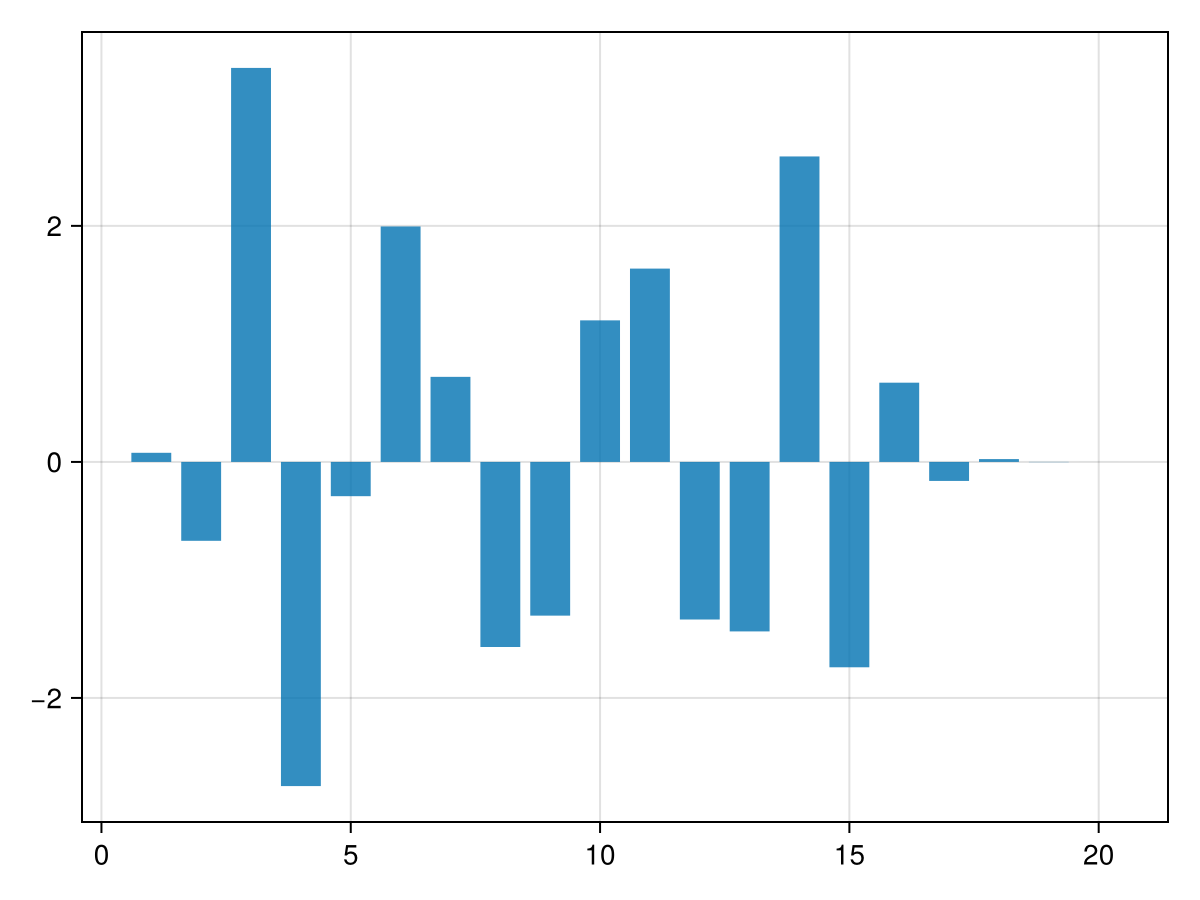

In [78]:
# generates a vector of random values from a normal (Gaussian) distribution with mean 0 and standard deviation 0.1. The number of random values is equal to the length of y.
y1 = y .+ rand(Normal(0,0.1),length(y)) # creates noisy version of vector y
b1 = Ainv * y1
# Creates barplot
barplot(b1)

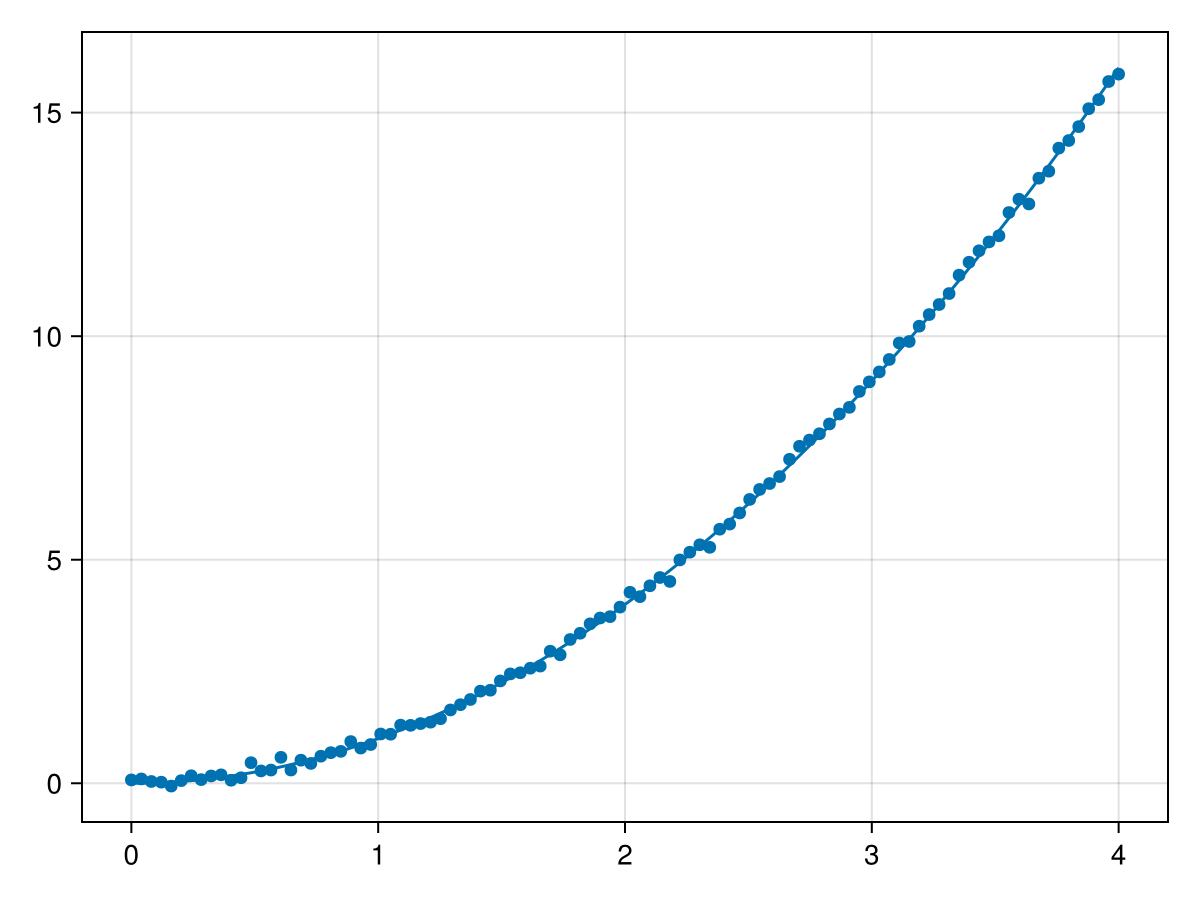

In [79]:
fig = Figure() # This creates a new figure object, which is essentially a blank canvas where plots and other graphical elements can be placed.
ax = Axis(fig[1,1]) # This adds an axis to the figure at position [1,1]. The figure layout system uses a grid, so you are specifying that this axis should occupy the first row and first column of that grid.
lines!(ax,x,y) # this plots a line on the axis ax using the data from x and y.
plot!(ax,x,y1) # his adds another plot to the same axis, y1 is noisy version
fig

In [80]:
# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [81]:
b10ls = lasso(A[:,1:10],y1,0.1,0)
b10lq = fitlq(A[:,1:10],y1)

10-element Vector{Float64}:
   0.09679017410506816
  -1.3248178509112778
   7.8192006940153345
 -15.432443152873702
  18.33617535803054
 -12.54763422405944
   5.120700710882412
  -1.2294452793146053
   0.16013196069464203
  -0.008724834982204083

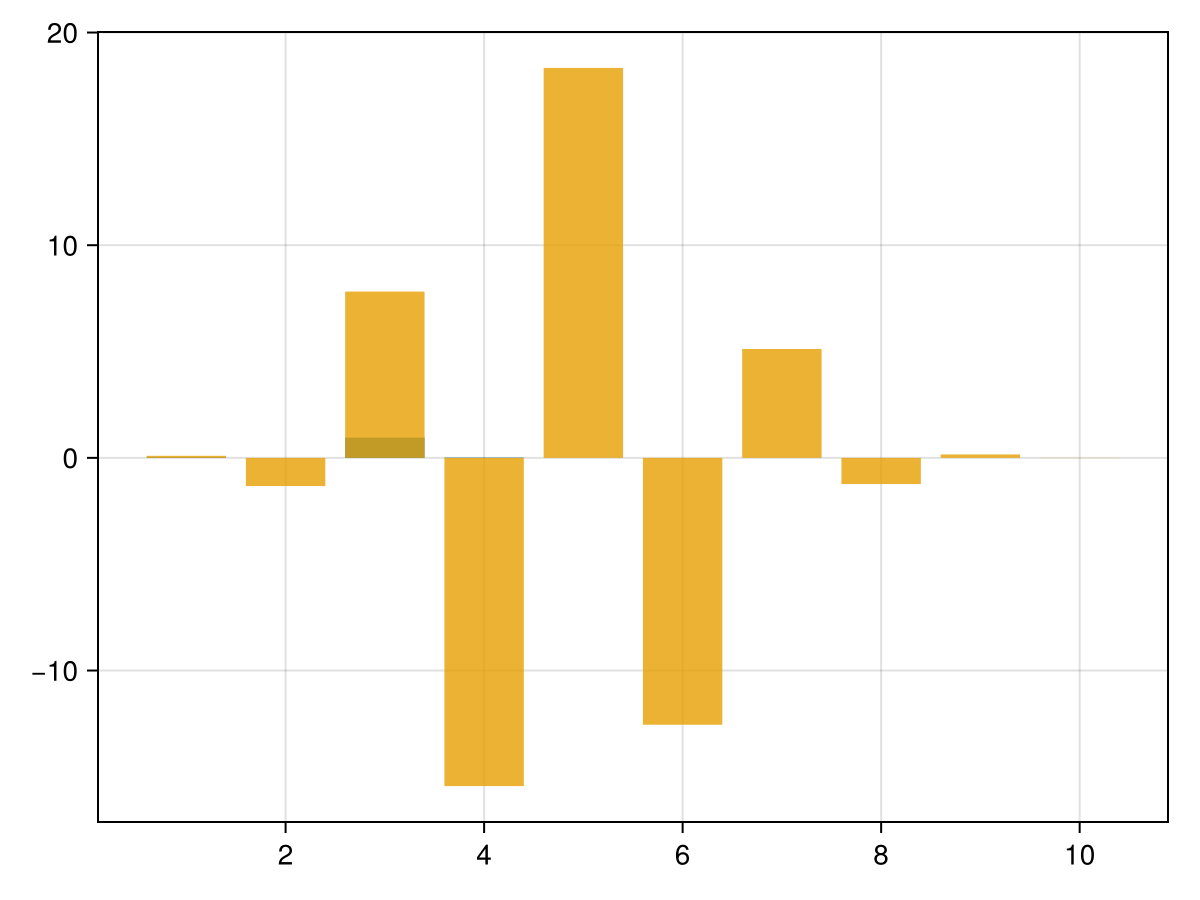

In [82]:
barplot(b10ls)
barplot!(b10lq)
current_figure()

In [83]:
# Lets look at Extrapolations
xx = LinRange(0,8,200)
yy = xx .^ 2

200-element Vector{Float64}:
  0.0
  0.001616120805030176
  0.006464483220120704
  0.014545087245271583
  0.025857932880482815
  0.040403020125754405
  0.05818034898108633
  0.07918991944647863
  0.10343173152193126
  0.13090578520744425
  0.16161208050301762
  0.19555061740865132
  0.23272139592434532
  ⋮
 57.12017373298654
 57.72945127648292
 58.34196106158936
 58.957703088305855
 59.5766773566324
 60.19888386656903
 60.8243226181157
 61.45299361127245
 62.08489684603925
 62.720032322416095
 63.35840004040302
 64.0

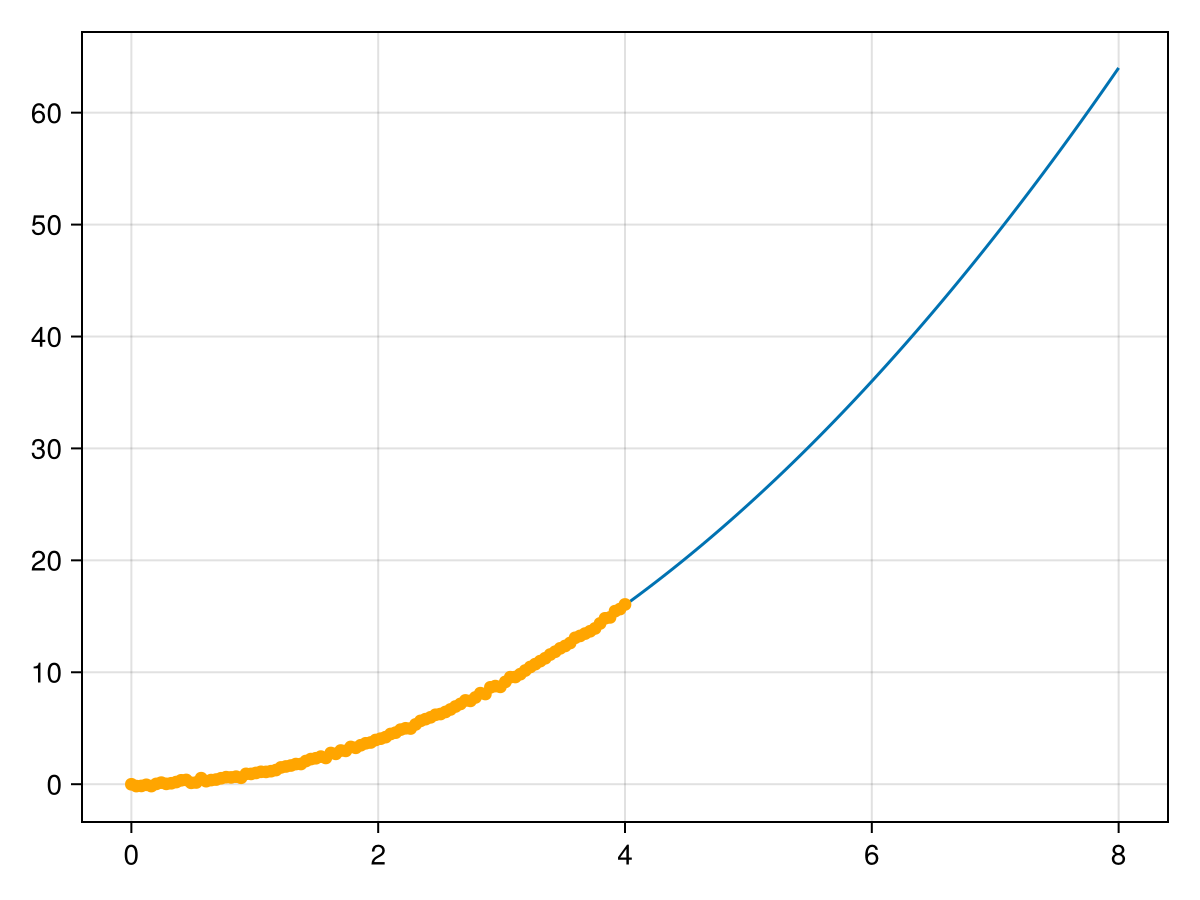

In [84]:
y1 = y .+ rand(Normal(0,0.1),length(y))
lines(xx,yy)
lines!(x,y)
scatter!(x,y1,color="orange")
current_figure()

In [85]:
# larger design matrix
AA = zeros(200,20)
for i in 1:200
    for j in 1:20
        AA[i,j] = xx[i]^(j-1)
    end
end

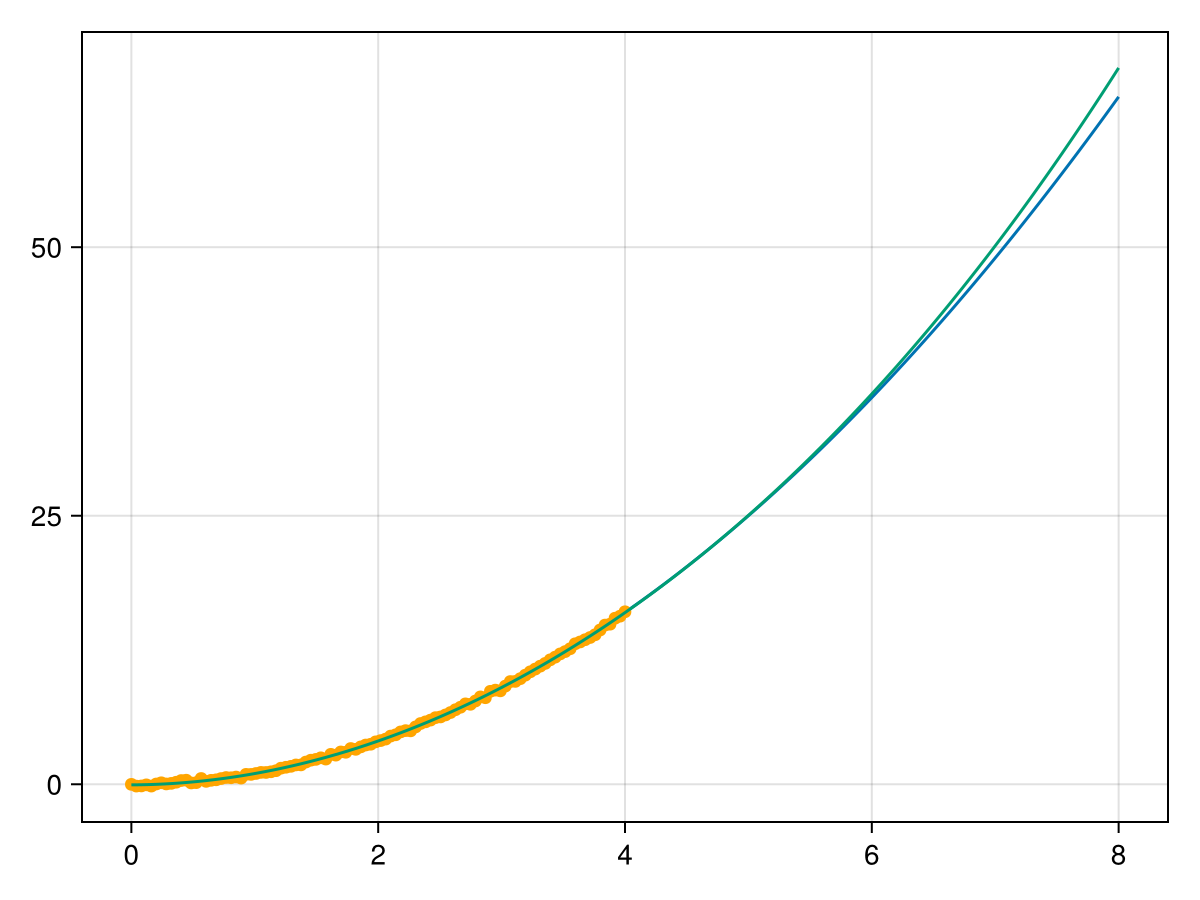

In [86]:
pd = 5
blq = fitlq(A[:,1:pd],y1)
y_ex = AA[:,1:pd]*blq
lines(xx,yy)
lines!(x,y)
scatter!(x,y1,color="orange")
lines!(xx,y_ex)
current_figure()

In [87]:
# Start of HW 4 ////
# Please take RegressionCurveFitting.jl and extend it to produce the graphs 4.14 a) (least squares) and 4.14 c) (LASSO) regression?  
# Produce 100 realizations of the data (different noise), 
# and perform regressions with different degree of polynomial fit functions.  The two plots display the boxplot of the distributions of 
# fitting parameters of the combined trials (you must 
# find the appropriate plotting function in Makie.jl).  You receive extra credit if you also plot the error distribution of both methods
# as in Fig. 4.15.

# Plot 4.14 shows the variance of fit coefficients to a 20th-degree polynomial, not, as I hinted, the variance of all parameters as a 
# function of the degree of polynomial. For this plot, you should not vary the degree but rather repeat the same fit to the 20th-degree 
# polynomial. I apologize.

In [88]:
deg = 20
x= LinRange(-2,2,100)
y= x .^2
ye = y .+ rand(rand(Normal(0,.1),length(y))) #add noise

100-element Vector{Float64}:
 3.9680504996726755
 3.808066824537486
 3.6513481223642374
 3.497894393152933
 3.34770563690357
 3.2007818536161508
 3.0571230432906744
 2.916729205927139
 2.779600341525548
 2.645736450085898
 2.5151375316081923
 2.387803586092428
 2.2637346135386074
 ⋮
 2.387803586092428
 2.5151375316081923
 2.645736450085898
 2.779600341525548
 2.916729205927139
 3.0571230432906744
 3.2007818536161508
 3.34770563690357
 3.497894393152933
 3.6513481223642374
 3.808066824537486
 3.9680504996726755

In [89]:
A = hcat([x .^ p for p in 0:deg]...)

100×21 Matrix{Float64}:
 1.0  -2.0      4.0      -8.0      …  -524288.0            1.04858e6
 1.0  -1.9596   3.84002  -7.52488          -3.55766e5      6.97157e5
 1.0  -1.91919  3.6833   -7.06896          -2.39469e5      4.59587e5
 1.0  -1.87879  3.52984  -6.63183     -159837.0            3.003e5
 1.0  -1.83838  3.37966  -6.2131           -1.05752e5      1.94412e5
 1.0  -1.79798  3.23273  -5.81239  …   -69328.4            1.24651e5
 1.0  -1.75758  3.08907  -5.42928      -45016.0        79119.1
 1.0  -1.71717  2.94868  -5.06339      -28937.5        49690.6
 1.0  -1.67677  2.81155  -4.71432      -18407.1        30864.4
 1.0  -1.63636  2.67769  -4.38167      -11580.2        18949.4
 1.0  -1.59596  2.54709  -4.06505  …    -7201.38       11493.1
 1.0  -1.55556  2.41975  -3.76406       -4424.1         6881.93
 1.0  -1.51515  2.29568  -3.47831       -2683.28        4065.57
 ⋮                                 ⋱                       ⋮
 1.0   1.55556  2.41975   3.76406        4424.1         6881

In [90]:
# constructs a matrix A where each column corresponds to x raised to increasing powers, from 𝑝 = 0
# up to a specified degree. Using reduce is more efficient = same reuslt with either one tho
A = reduce(hcat, [x .^p for p in 0:deg])

100×21 Matrix{Float64}:
 1.0  -2.0      4.0      -8.0      …  -524288.0            1.04858e6
 1.0  -1.9596   3.84002  -7.52488          -3.55766e5      6.97157e5
 1.0  -1.91919  3.6833   -7.06896          -2.39469e5      4.59587e5
 1.0  -1.87879  3.52984  -6.63183     -159837.0            3.003e5
 1.0  -1.83838  3.37966  -6.2131           -1.05752e5      1.94412e5
 1.0  -1.79798  3.23273  -5.81239  …   -69328.4            1.24651e5
 1.0  -1.75758  3.08907  -5.42928      -45016.0        79119.1
 1.0  -1.71717  2.94868  -5.06339      -28937.5        49690.6
 1.0  -1.67677  2.81155  -4.71432      -18407.1        30864.4
 1.0  -1.63636  2.67769  -4.38167      -11580.2        18949.4
 1.0  -1.59596  2.54709  -4.06505  …    -7201.38       11493.1
 1.0  -1.55556  2.41975  -3.76406       -4424.1         6881.93
 1.0  -1.51515  2.29568  -3.47831       -2683.28        4065.57
 ⋮                                 ⋱                       ⋮
 1.0   1.55556  2.41975   3.76406        4424.1         6881

In [91]:

# From earlier in the code:

# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [92]:
realiz = 100 
ls_co = zeros(deg+1, realiz) # matrix 0
lasso_co = zeros(deg+1, realiz) # matrix 0

21×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [93]:
for i in 1:realiz
    yn = x.^2 .+ 0.1 * randn(100)  # Noisy 
    
    ls_co[:, i] = fitlq(A, yn)
    lasso_co[:, i] = lasso(A, yn, 0.1, 0.1)  
end

# each contain 100 sets of regression coefficients for the noisy quadratic data, one set per realization, allowing for 
# analysis of variability in the coefficient estimates across the realizations.

ls_co

21×100 Matrix{Float64}:
  -0.0114889     0.0220412    0.00141556  …   -0.013051      -0.0148505
   0.224409      0.0795704   -0.0223837        0.0233094      0.394065
   0.906478      0.923811     0.959547         1.1338         0.101182
  -1.06624      -0.32494     -0.0786181       -0.822442      -4.6077
   2.11771      -2.70496      1.80795         -2.57362        8.0374
   0.0129072    -0.105799     1.99109     …    2.32499       17.2992
  -8.92843      15.5675      -6.74775         10.7386       -25.464
   6.1565        2.17353     -6.39692         -2.93674      -31.6337
  17.3249      -32.9072      10.4499         -18.9102        40.7524
 -11.6234       -3.92446      8.99946          2.09549       32.7411
 -18.4881       35.5538      -8.8302      …   17.5576       -37.5653
   9.81966       3.22974     -6.87822         -0.935454     -20.4544
  11.686       -22.1002       4.56662         -9.45442       21.1123
  -4.50746      -1.43826      3.05989          0.271337       7.85571
  -

In [94]:
# another way to perform task

# Define parameters
realiz = 100
co_ls = zeros(deg + 1, realiz)
co_lasso = zeros(deg + 1, realiz)

# Generate matrix A (basis terms) and data vector x once
A = hcat([x .^ p for p in 0:deg]...)

# Loop with a function to reduce repetitive code
perform_regressions(A, realiz) = [fitlq(A, x.^2 .+ 0.1 * randn(100)) for _ in 1:realiz]

# Store results directly from mapping
co_ls .= hcat(perform_regressions(A, realiz)...)
co_lasso .= hcat([lasso(A, x.^2 .+ 0.1 * randn(100), 0.1, 0.1) for _ in 1:realiz]...)

co_ls


21×100 Matrix{Float64}:
  -0.020815      0.0248426     0.0222398   …    0.000869237   0.0250139
  -0.46676       0.0900064    -0.150105         0.181907      0.0937481
   1.19526      -0.235006      0.307929         1.14079       0.234208
   5.54918      -0.867242      2.29545         -2.59344      -1.71019
   0.623689     11.8009        5.04252         -0.358011      1.99952
 -20.0707        4.63284      -8.40314     …    9.6525        5.37289
  -6.91604     -38.2684      -16.5413          -0.657173     -0.201786
  33.5233      -10.7877       13.2793         -16.0507       -6.43957
  16.9597       60.528        28.8155           2.98416      -5.26957
 -30.7254       12.8211      -10.9583          15.0356        2.87758
 -19.9467      -54.296       -29.073       …   -3.97336       8.24956
  16.7054       -8.67746       5.07195         -8.7057        0.480593
  13.2358       29.5722       17.8162           2.70071      -5.99815
  -5.53298       3.49702      -1.31301          3.18792    

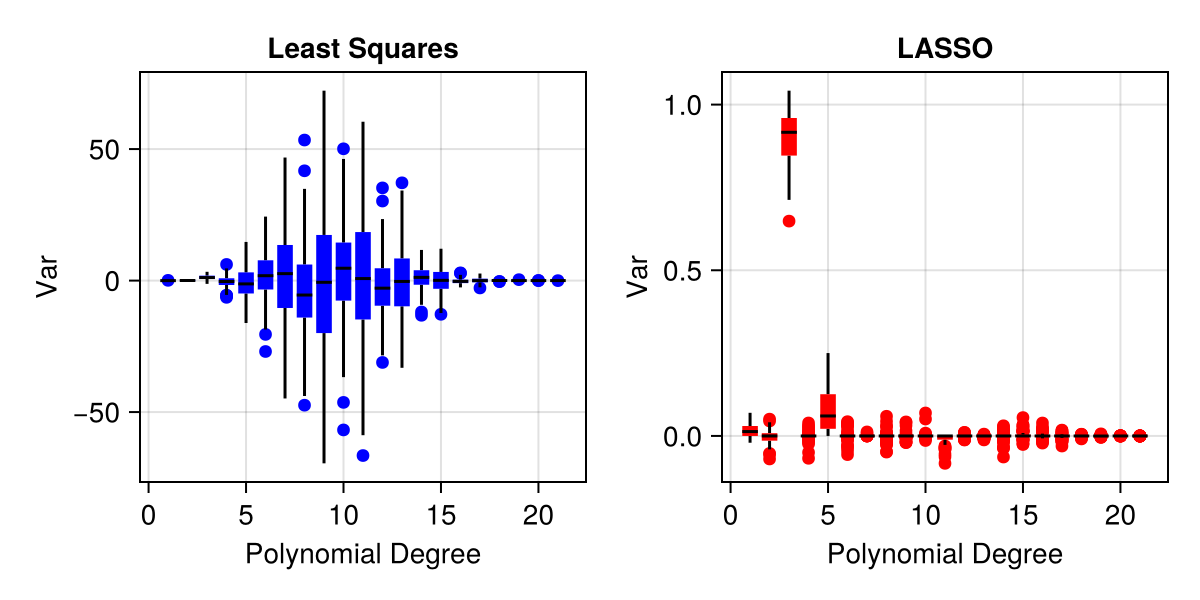

CairoMakie.Screen{IMAGE}


In [95]:


# Define figure with subplots for LS and LASSO boxplots
fig = Figure(size = (600, 300))

# Define boxplot properties and setup
plot_params = (
    xlabel = "Polynomial Degree",
    ylabel = "Var",
)

# LS
ax_ls = Axis(fig[1, 1]; title = "Least Squares", plot_params...)
boxplot!(ax_ls, repeat(1:(deg+1), realiz), vec(ls_co), color = :blue)

# LASSO
ax_lasso = Axis(fig[1, 2]; title = "LASSO", plot_params...)
boxplot!(ax_lasso, repeat(1:(deg+1), realiz), vec(lasso_co), color = :red)

# Display figure
display(fig)

In [96]:
# Two Ways:

ls_er = zeros(realiz)
lasso_er = zeros(realiz)

for i in 1:realiz
    yn = x.^2 .+ 0.1 * randn(100)  # Noisy data
    
    # Predicted
    y_pred_ls = A * ls_co[:, i]
    y_pred_lasso = A * lasso_co[:, i]
    
    # Errors
    ls_er[i] = norm(yn - y_pred_ls) / norm(yn)
    lasso_er[i] = norm(yn - y_pred_lasso) / norm(yn)
end
lasso_er


100-element Vector{Float64}:
 0.0519666428618212
 0.05949717066536891
 0.056110297572399125
 0.05377230013968717
 0.05983981930516853
 0.053594102373376286
 0.052860728895574506
 0.052958441446524014
 0.06459517057204836
 0.06431666157128152
 0.05739660641396522
 0.06108254433766965
 0.06521548569426631
 ⋮
 0.06489829658874884
 0.06189456034256563
 0.05609686769386666
 0.06480224665585989
 0.056565302318817706
 0.06229899285133697
 0.05293013560894896
 0.06114368178840424
 0.057929285656518864
 0.062114849067573065
 0.06649814745575845
 0.05938906332892296

In [97]:
# Define function to generate noisy data and compute normalized errors for a given model
function normalized_error(coefs)
    yn = x.^2 .+ 0.1 * randn(100)  # Generate noisy data
    y_pred = A * coefs             # Predicted values based on model coefficients
    return norm(yn - y_pred) / norm(yn)  # Normalized error
end

# Compute normalized errors for LS and LASSO models
ls_er = map(normalized_error, eachcol(ls_co))
lasso_er = map(normalized_error, eachcol(lasso_co))


100-element Vector{Float64}:
 0.05418089106927582
 0.05890137379491483
 0.053247784909999804
 0.05554034022857768
 0.058731510841919306
 0.06626452931008582
 0.05769206053744822
 0.058469266160103665
 0.056015335764272006
 0.06254331908116245
 0.050913731487909966
 0.05832726716131755
 0.05413711430749407
 ⋮
 0.05947386786750739
 0.0593911646424775
 0.05274951809034499
 0.051790523670468505
 0.0586925211335817
 0.06156278167344583
 0.06564710825478501
 0.06194821145610376
 0.05780592069190298
 0.049793320507729305
 0.062285945051208116
 0.05518917664471411

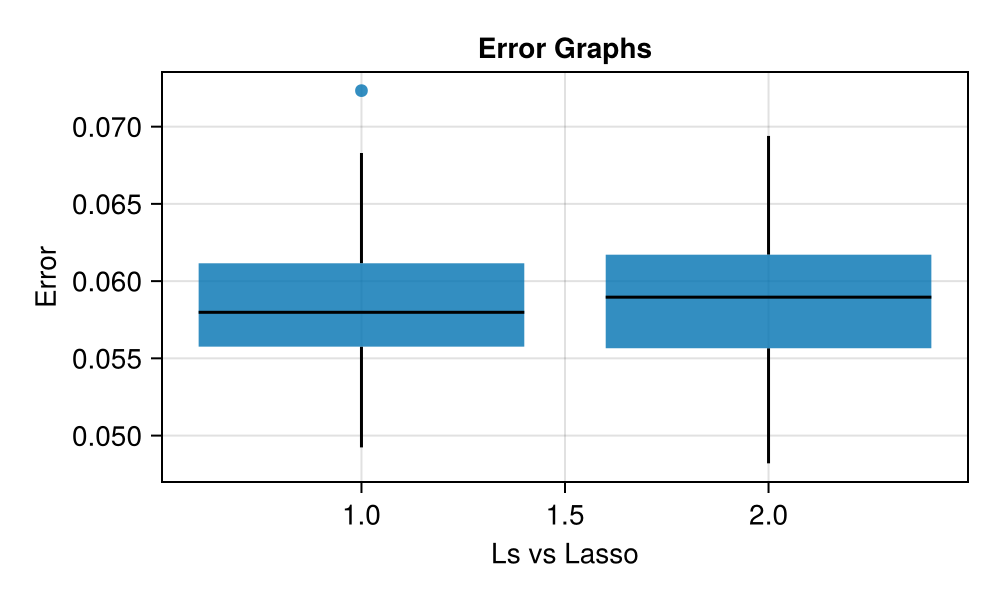

CairoMakie.Screen{IMAGE}


In [100]:

# Plot error and compare
fig_er = Figure(size = (500, 300))
er_plot = Axis(fig_er[1, 1], title = "Error Graphs", xlabel = "Ls vs Lasso", ylabel = "Error")
boxplot!(er_plot, repeat([1, 2], realiz), vcat(ls_er, lasso_er))



display(fig_er)
